# This notebook will detail my exploration of the IRIS dataset. I will also build a model that classifies type of flowers based on the IRIS dataset

In [1]:
import numpy as np
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm

data = pd.read_csv('/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/Iris.csv')



## Lets get a preview

In [2]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data['Species'].value_counts()


Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
data.shape

(150, 6)

#### Correlation matrix of the dataset (Extremely useful for building the model)

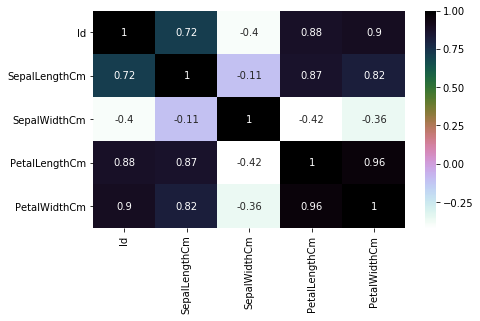

In [7]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

### Some neat graphs

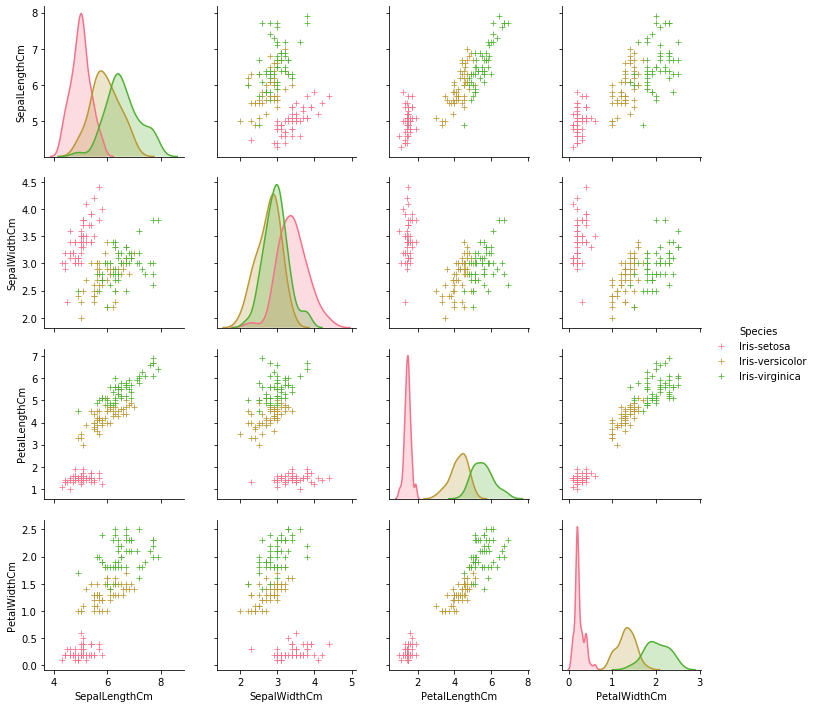

In [8]:
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

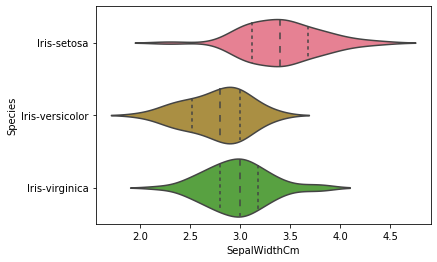

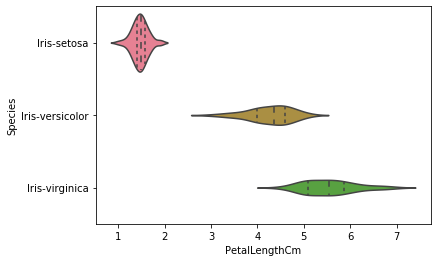

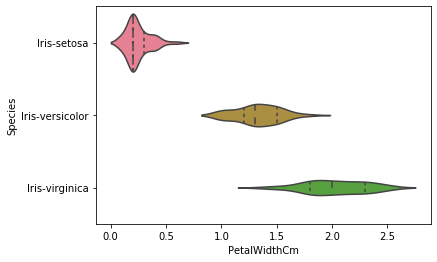

In [9]:
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

### Lets examine some relationships in the data 

#### Scatter plot of SepalLength (cm) vs SepalWidth (cm)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


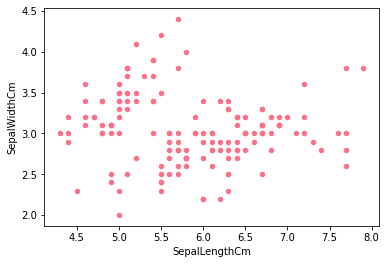

In [10]:
data.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm")

#### Lets examine petalLength (cm) vs petalWidth (cm)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


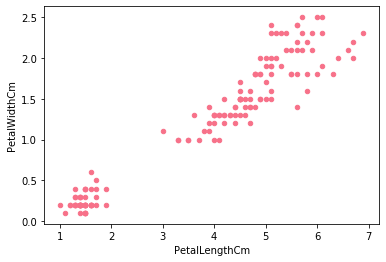

In [11]:
data.plot(kind = "scatter", x = "PetalLengthCm", y = "PetalWidthCm")

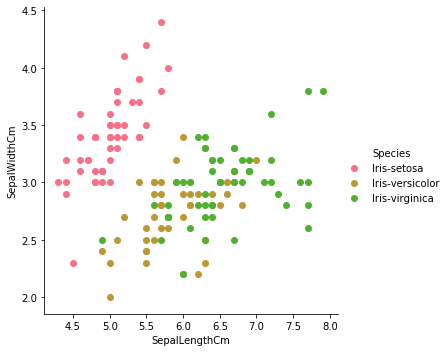

In [12]:
sns.FacetGrid(data, hue="Species", size = 5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

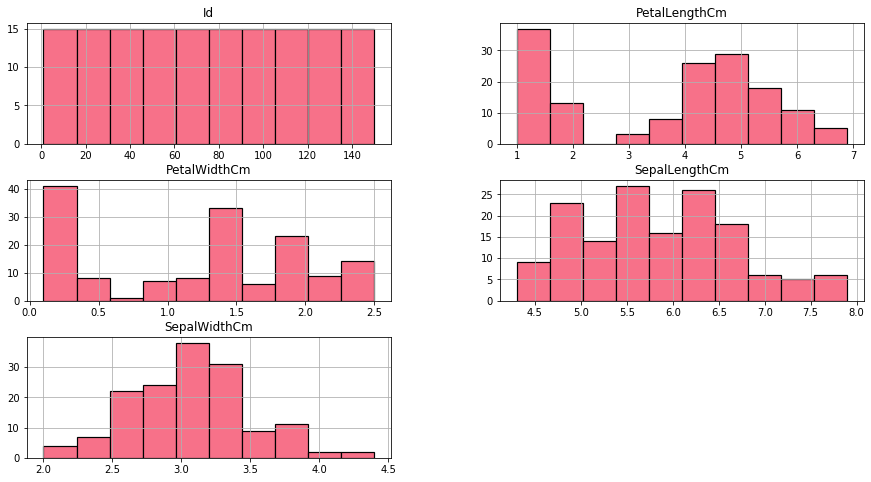

In [13]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

### Lets do some machine learning on the iris dataset!

In [14]:
train, test = train_test_split(data, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [15]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

train_X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
9,4.9,3.1,1.5,0.1
0,5.1,3.5,1.4,0.2
82,5.8,2.7,3.9,1.2
42,4.4,3.2,1.3,0.2
75,6.6,3.0,4.4,1.4


In [16]:
test_X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
134,6.1,2.6,5.6,1.4
11,4.8,3.4,1.6,0.2
89,5.5,2.5,4.0,1.3
35,5.0,3.2,1.2,0.2
33,5.5,4.2,1.4,0.2


In [17]:
train_y.head()  ##output of the training data

9         Iris-setosa
0         Iris-setosa
82    Iris-versicolor
42        Iris-setosa
75    Iris-versicolor
Name: Species, dtype: object

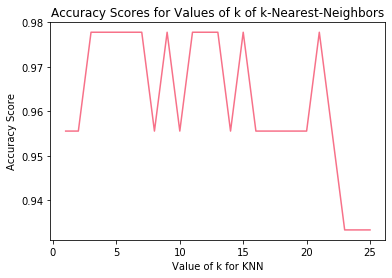

In [19]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    prediction = knn.predict(test_X)
    scores.append(metrics.accuracy_score(prediction, test_y))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

### Lets get an accuracy socore on a basic regression model

In [20]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)
prediction = logreg.predict(test_X)
print(metrics.accuracy_score(prediction, test_y))

0.9555555555555556


In [21]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9555555555555556


In [22]:
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556
